#### In this notebook we created the Exploratory Data Analysis (EDA)

In [1]:
# Constants
DATA_PATH = "../data/raw/train_users_2.csv"
EXPORT_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH2 = "../data/processed/2_preprocessed_df.pkl"

FIG_DIR = "../reports/figures"

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle
import os

%matplotlib inline

In [3]:
# Read Data
raw_df = pd.read_pickle(EXPORT_PATH2)

In [4]:
df = raw_df.copy()

#### Uni-Variate Visualization

In [5]:
print(df['age'].describe())

count    213451.000000
mean         36.014767
std          10.786017
min          18.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         115.000000
Name: age, dtype: float64


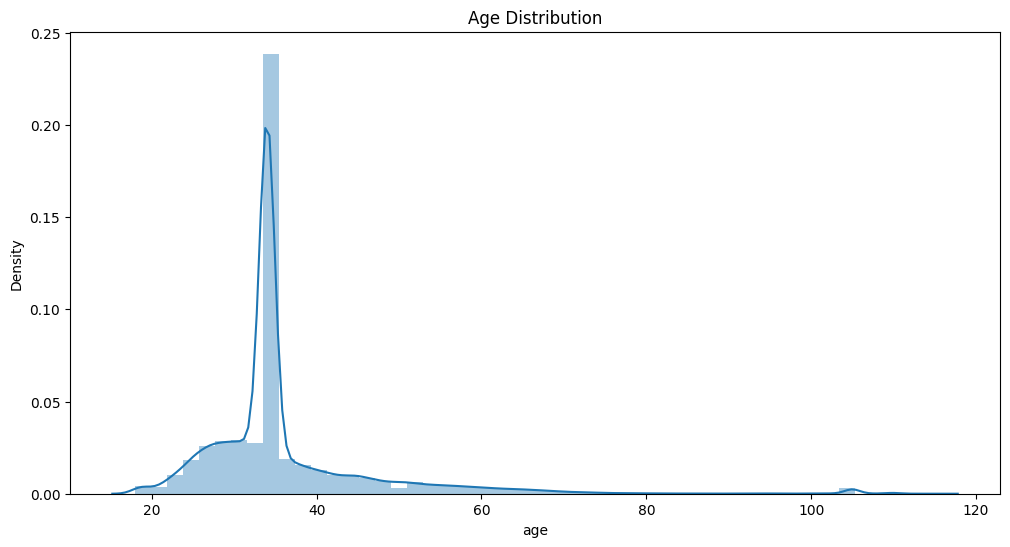

In [6]:
# Age Distribution
plt.figure(figsize=(12,6))
sns.distplot(df.age.dropna())
plt.title("Age Distribution")

plt.savefig(os.path.join(FIG_DIR, "age_distribution_freq.png"))

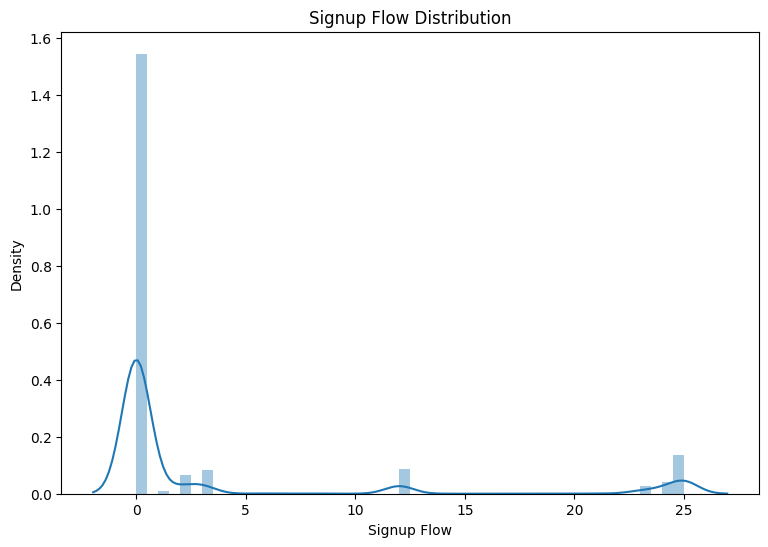

In [7]:
plt.figure(figsize=(9,6))
sns.distplot(x = df['signup_flow']);
plt.xlabel('Signup Flow')
plt.title('Signup Flow Distribution')

plt.savefig(os.path.join(FIG_DIR, 'Signup Flow Distribution.png'))

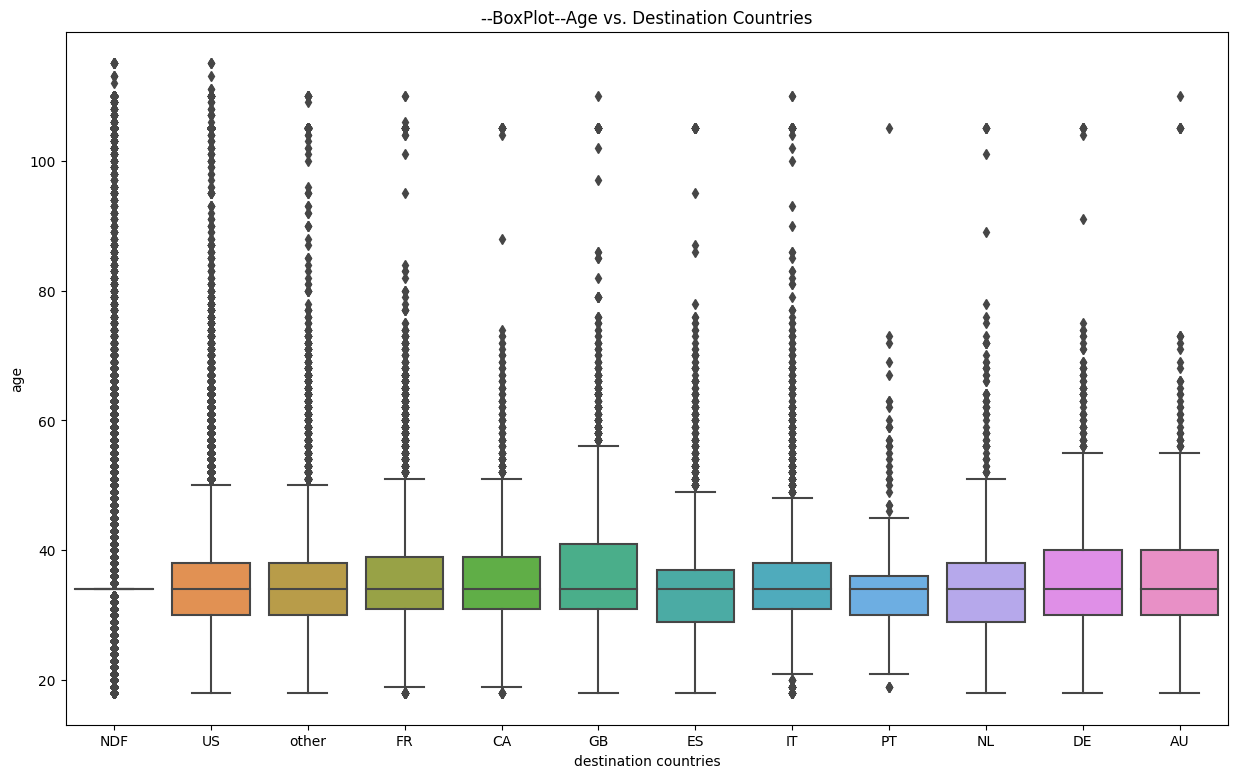

In [8]:
# Boxplot
plt.figure(figsize=(15,9))
sns.boxplot(x='country_destination', y='age', data=df.dropna())
plt.xlabel('destination countries')
plt.title('--BoxPlot--Age vs. Destination Countries');

plt.savefig(os.path.join(FIG_DIR, '--BoxPlot--Age vs. Destination Countries.png'))

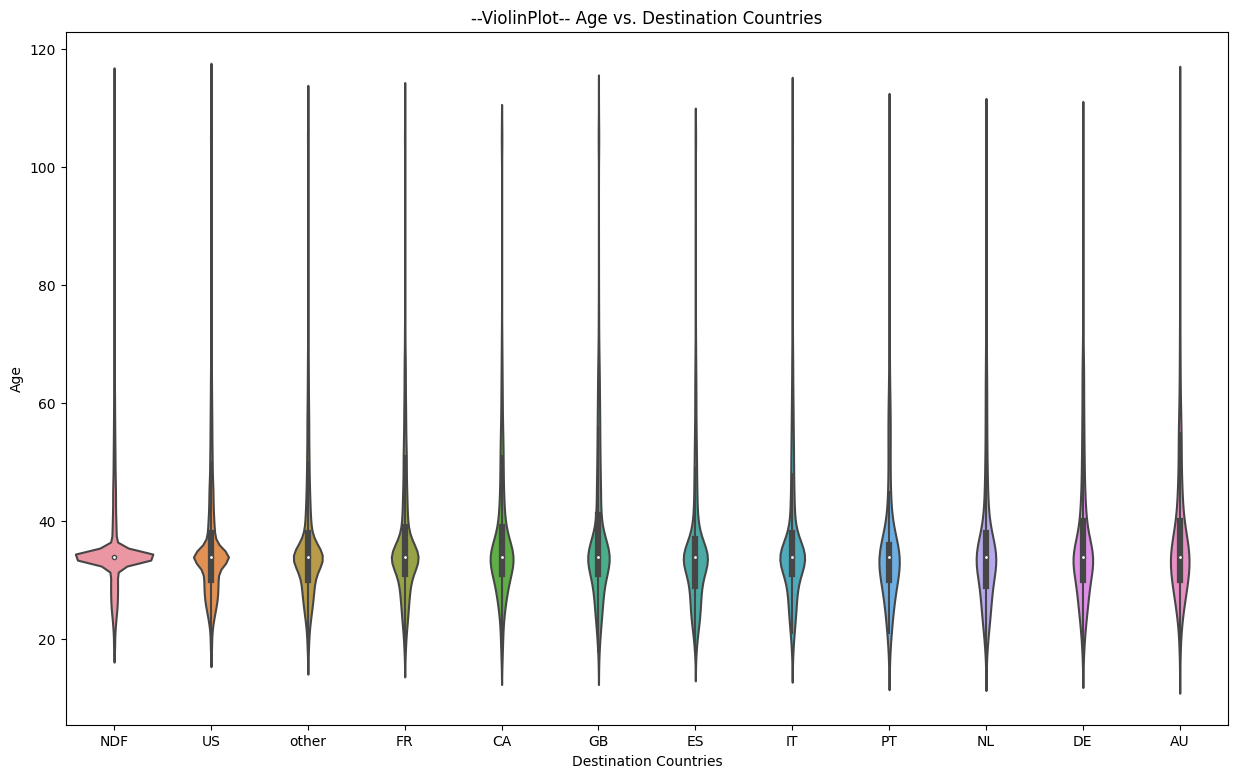

In [9]:
# Violin PLot
plt.figure(figsize=(15,9))
sns.violinplot(x='country_destination', y='age', data=df.dropna())
plt.xlabel('Destination Countries')
plt.ylabel('Age')
plt.title('--ViolinPlot-- Age vs. Destination Countries');

plt.savefig(os.path.join(FIG_DIR, '--ViolinPlot-- Age vs. Destination Countries.png'))

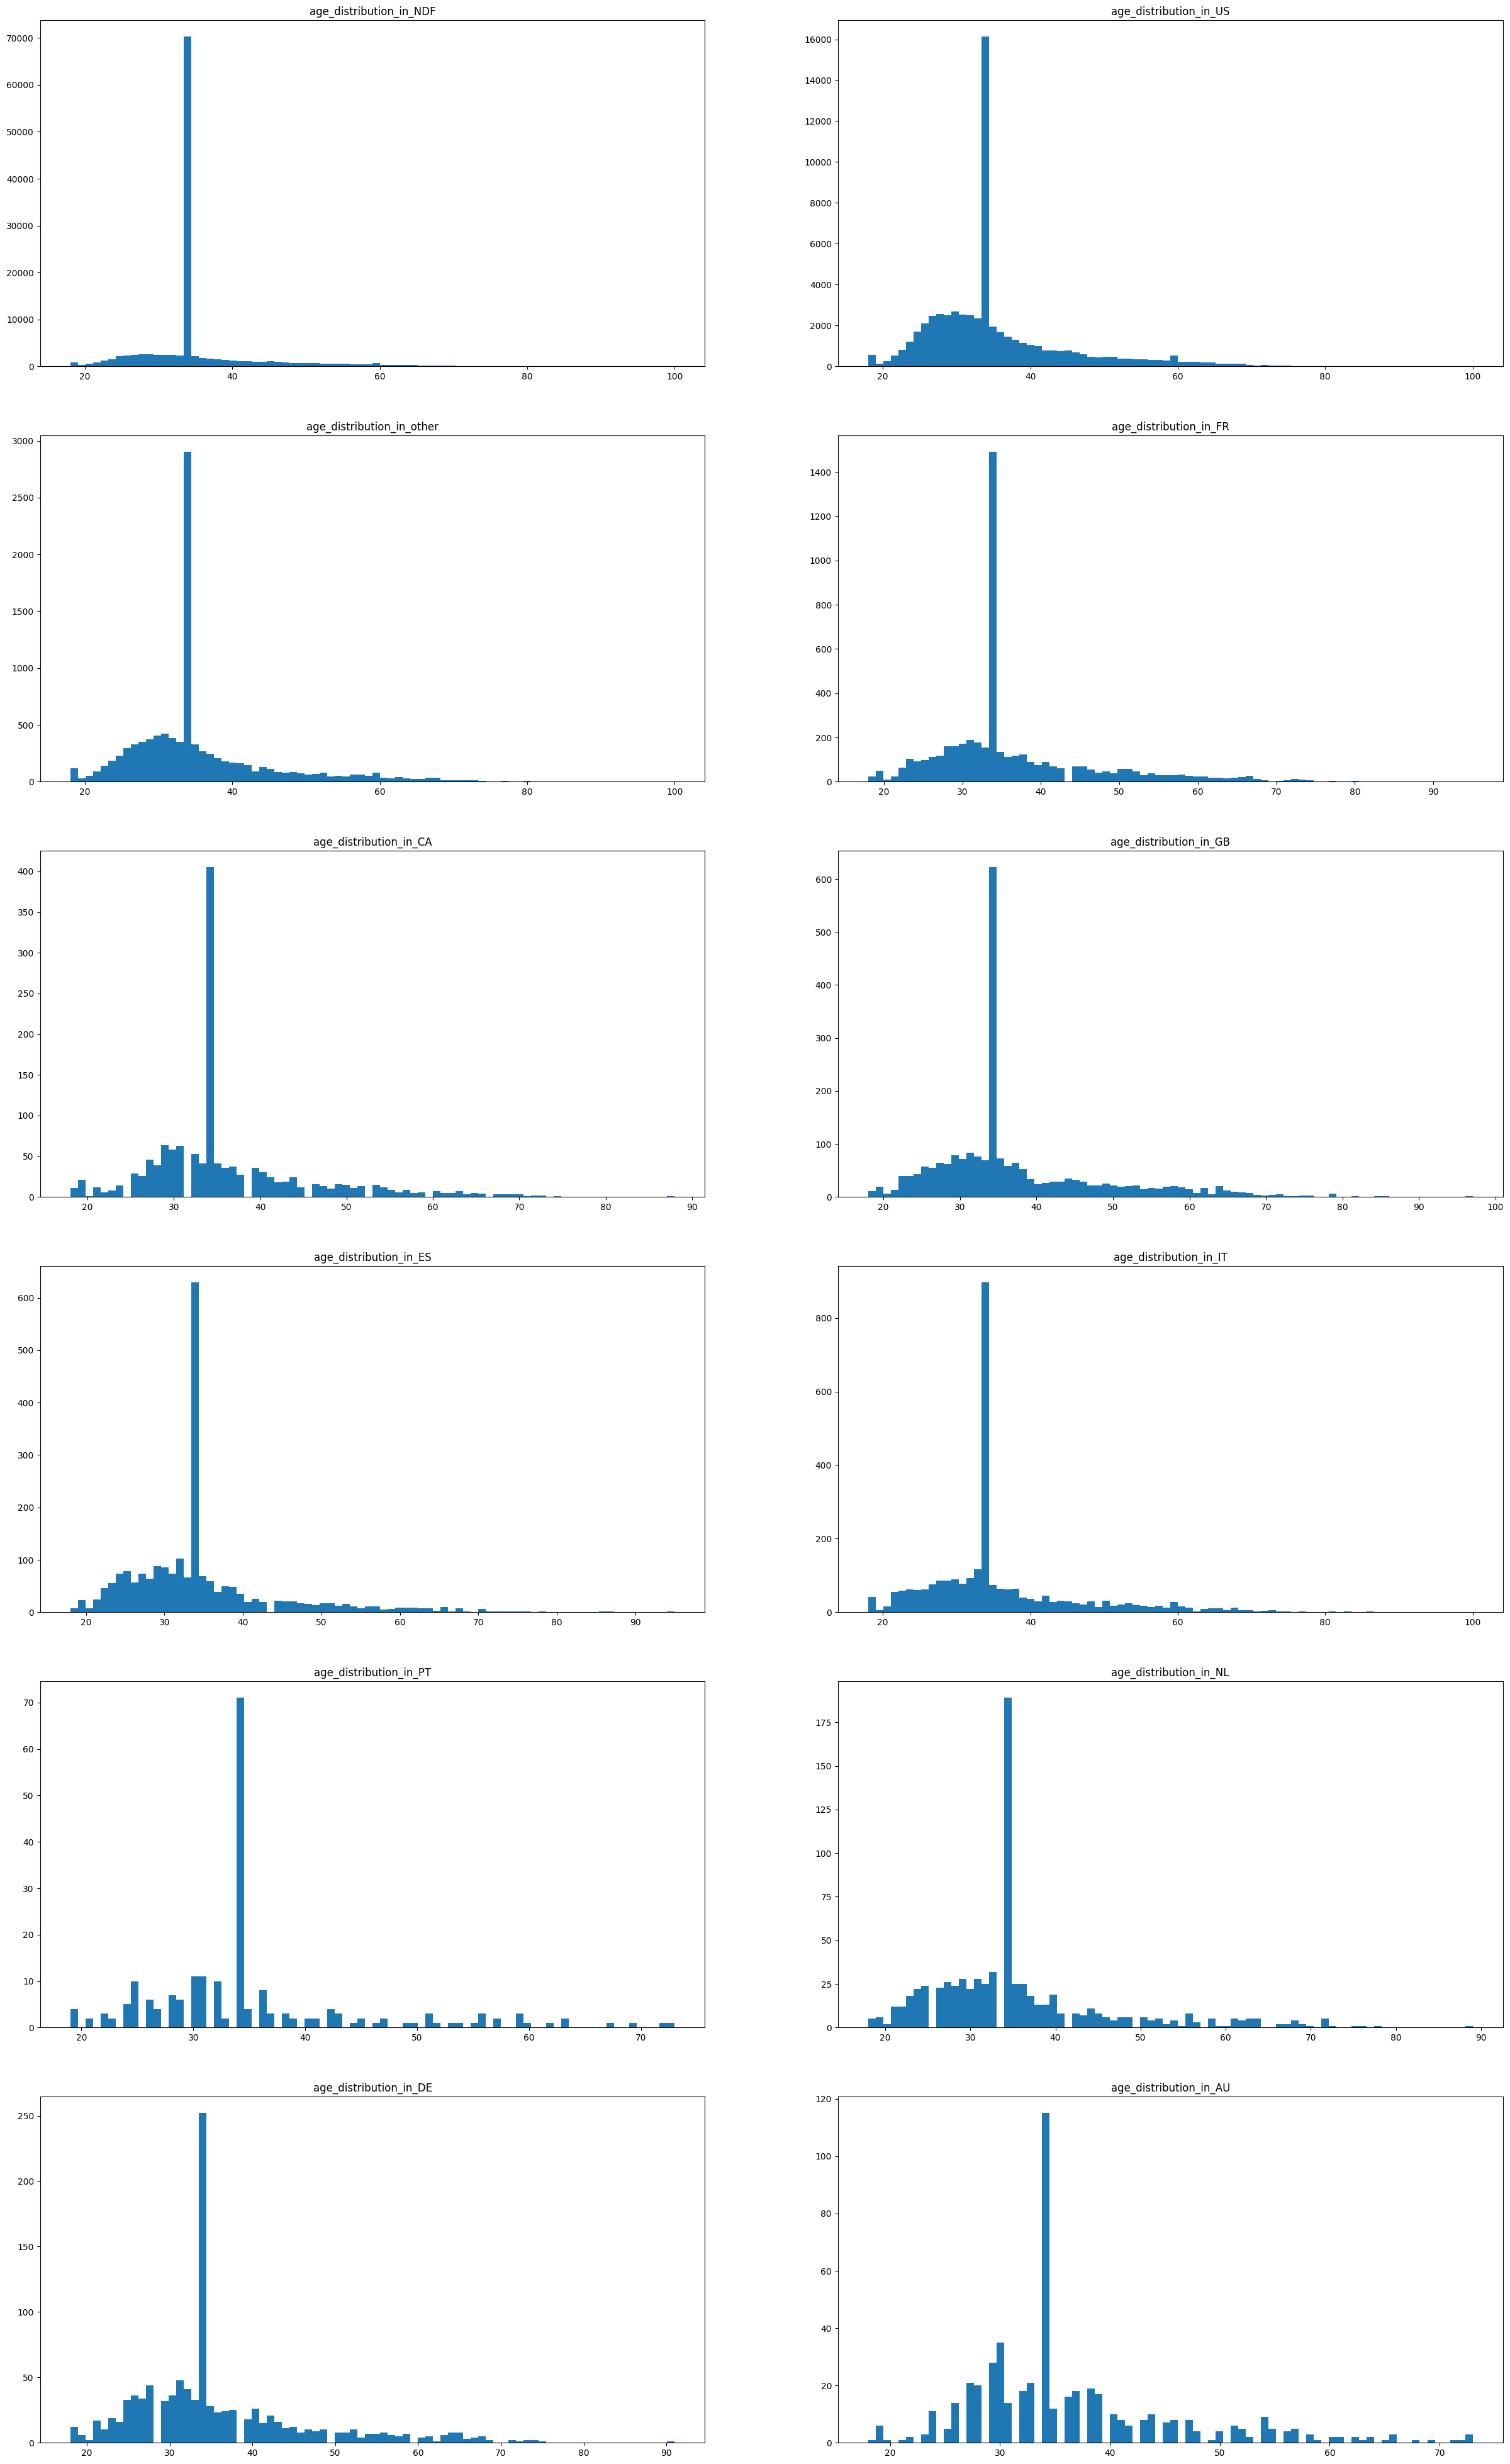

In [10]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(30, 50))
i=0
j=0

for country in df['country_destination'].unique():
    axes[i, j].hist(df[(df['age']<=100) & (df['country_destination'] == country)]['age'], bins=80)
    axes[i, j].set_title('age_distribution_in_{}'.format(country))
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.xticks();

plt.savefig(os.path.join(FIG_DIR, 'Age dist vs. Destination Countries.png'))

#### Bi-Variate Analysis

In [11]:
# Add colors for barplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

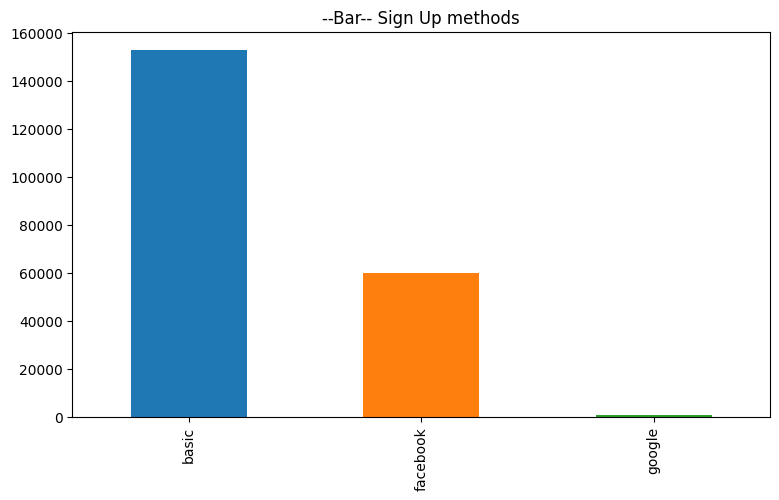

In [12]:
plt.figure(figsize = (9,5))
df.signup_method.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.title("--Bar-- Sign Up methods");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- Sign Up methods.png'))

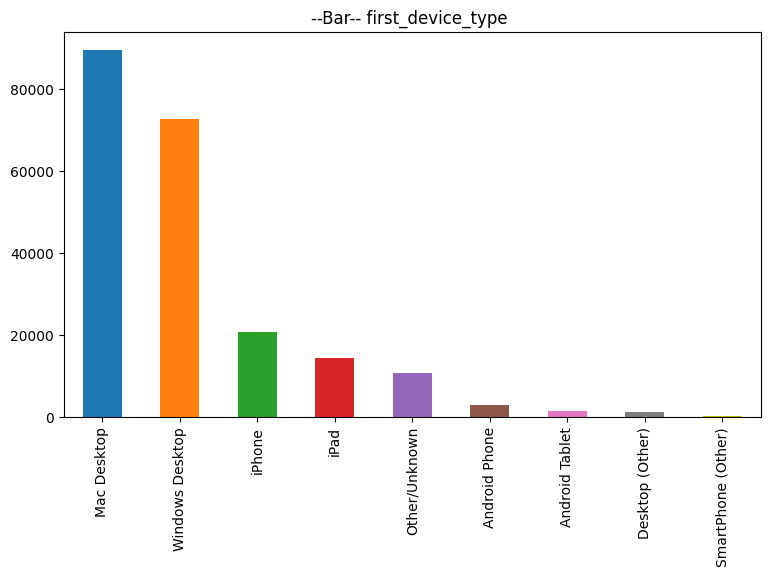

In [13]:
plt.figure(figsize = (9,5))
df.first_device_type.value_counts(dropna=False).plot(kind='bar', color=colors)
plt.title("--Bar-- first_device_type ");

plt.savefig(os.path.join(FIG_DIR, '--Bar-- first_device_type.png'))

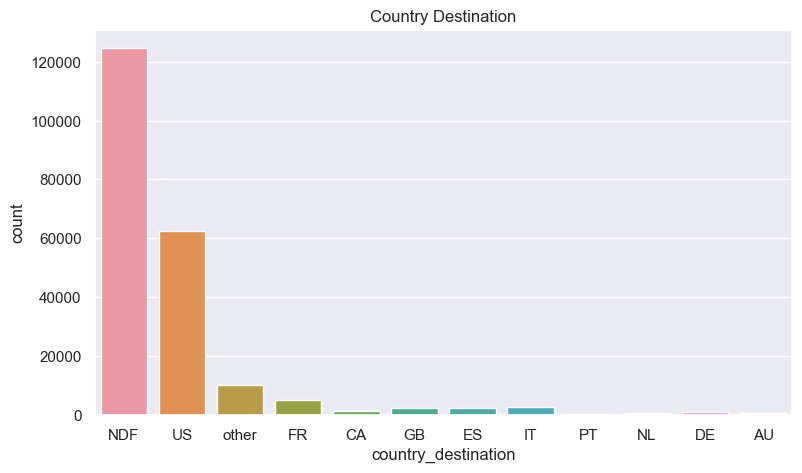

In [14]:
# Destination Country Share

plt.figure(figsize=(9,5))

sns.set(style="darkgrid")

ax = sns.countplot(x="country_destination", data=df)

plt.title("Country Destination");


plt.savefig(os.path.join(FIG_DIR, '--Bar-- country_destination.png'))

#### Multi-Variate Analysis and Visualization

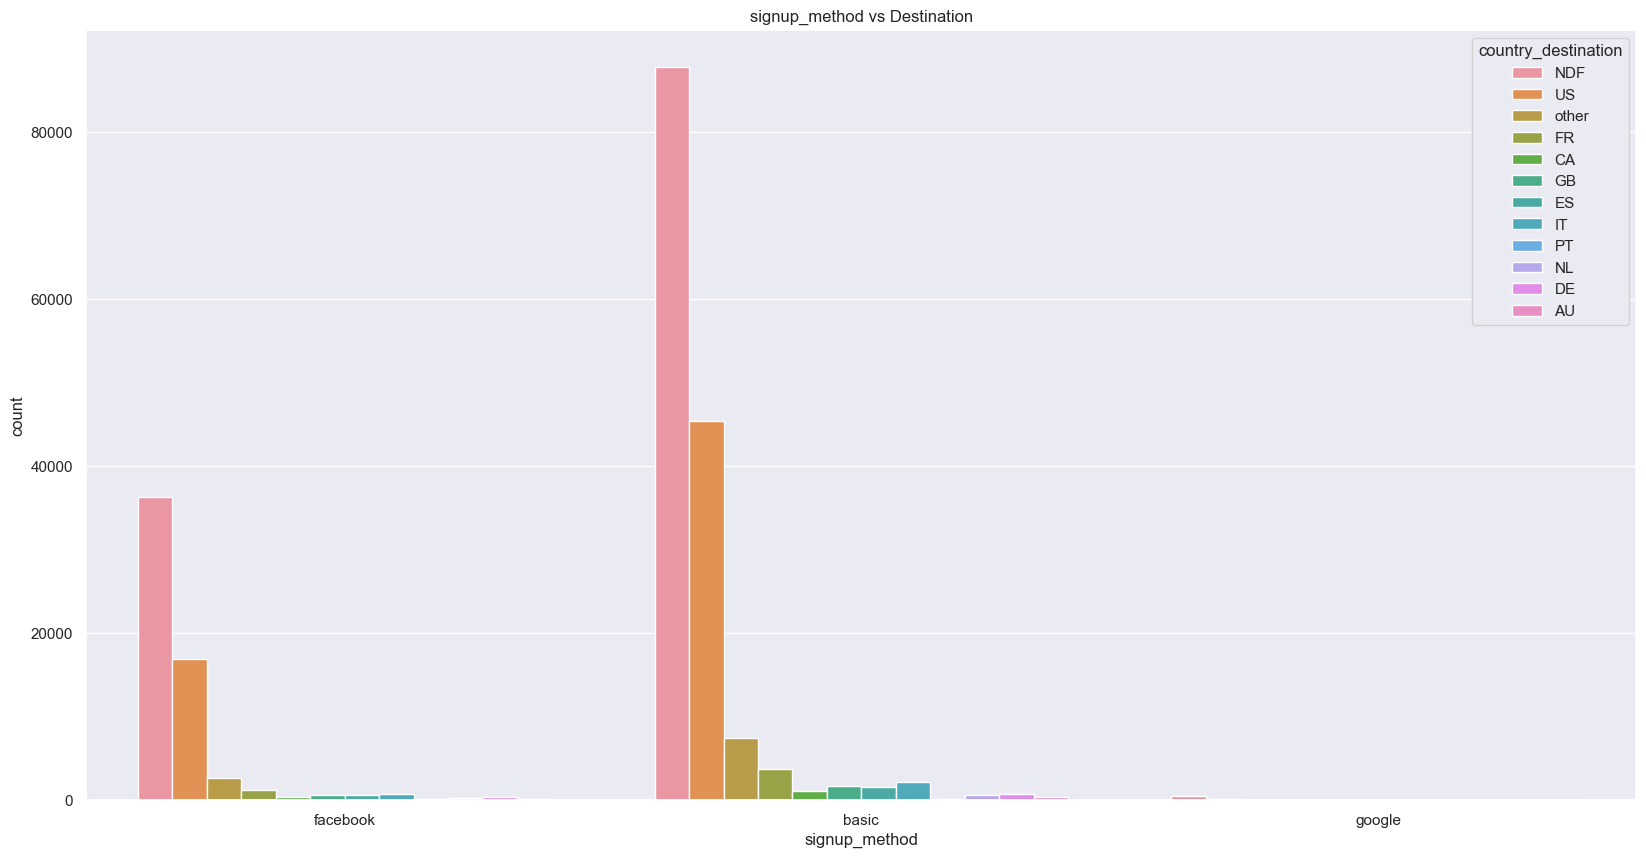

In [15]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="signup_method", hue="country_destination", data=df)

plt.title("signup_method vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- signup_method vs Destination.png'))

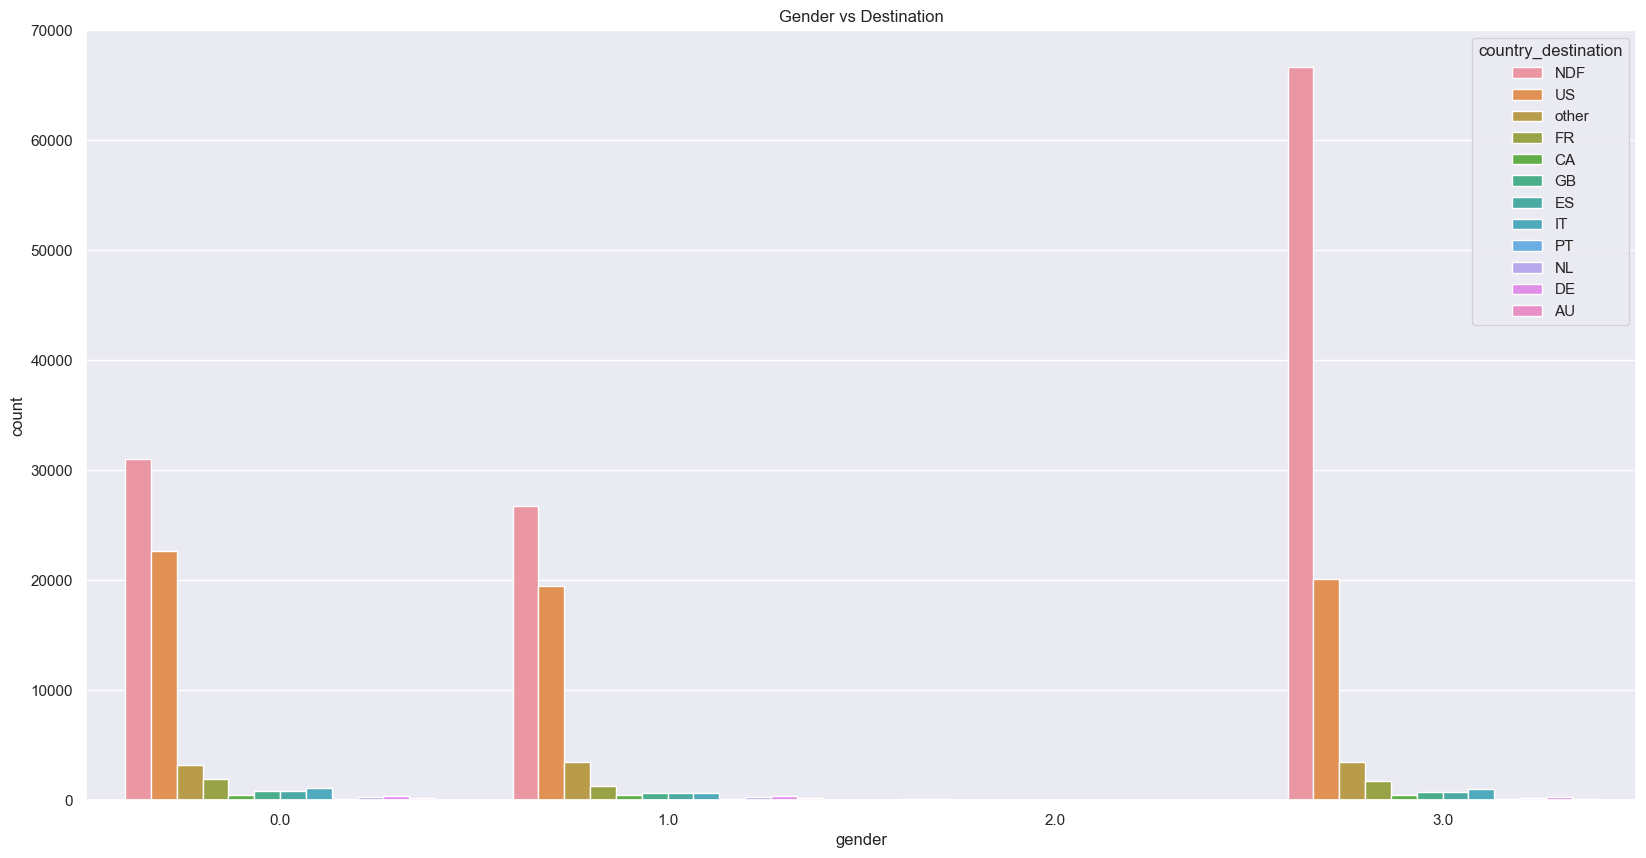

In [16]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="gender", hue="country_destination", data=df)

plt.title("Gender vs Destination");

plt.savefig(os.path.join(FIG_DIR, '--Multi-Bar-- Gender vs Destination.pdf'))